## **EMNIST - Hand Writing Recognition using ANN**

Importing all relevant and Necessory libraries with modules

In [285]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers
from keras.layers import *
from keras.utils import np_utils
from tensorflow import keras

The EMNIST Dataset is a set of Handwritten Character digits. which is converted to 28 x 28 pixel image format



*   Each row is a separate image
*   there are 785 columns in the dataset
*   first column is a class_label i.e target variables column
*   Each column after represents one pixel value.
total 784 columns for 28 X 28 pixel image 





Loading The Dataset of containing handwritten digit and handwritten alphabetical characters.

Following Paths For Datasets 

In [340]:
path="/content/drive/MyDrive/emnist-balanced-train.csv"

Reading The Datasets and creating the Dataframe for training

In [339]:
df = pd.read_csv(path, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [288]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,112800.00000,112800.0,112800.0,112800.0,112800.0,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,...,112800.000000,112800.0,112800.0,112800.000000,112800.000000,112800.0,112800.0,112800.0,112800.0,112800.0
mean,23.00000,0.0,0.0,0.0,0.0,0.001365,0.011560,0.020700,0.017438,0.018475,...,0.000310,0.0,0.0,0.002163,0.000284,0.0,0.0,0.0,0.0,0.0
std,13.56472,0.0,0.0,0.0,0.0,0.235046,1.221826,1.658797,1.602478,1.719549,...,0.104211,0.0,0.0,0.726499,0.095279,0.0,0.0,0.0,0.0,0.0
min,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,11.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,23.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,35.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,46.00000,0.0,0.0,0.0,0.0,63.000000,192.000000,217.000000,217.000000,217.000000,...,35.000000,0.0,0.0,244.000000,32.000000,0.0,0.0,0.0,0.0,0.0


dataset does not contain any null value and duplicated value.

In [289]:
df.shape

(112800, 785)

The Dataset Contains 112800 rows and 785 columns 

Total Images : 112800 images

Images Dimension : 28 x 28

Each image described using 784 variables (28 x 28 pixel) and one column is output variable

**Creating the Dictionaty for Labels Target Variable**

The Target Variables i.e output variables comprise of 0-46 values where 0-9 for 0-9 numbers, 10-35 stands for uppercase A-Z and 35+ stands for lowercase alphabets. 

we will create a dictionary which will have key and value pairs for the target variables and there values

In [290]:
labels = pd.read_csv("/content/drive/MyDrive/emnist-balanced-mapping.txt", 
                     delimiter = " ",
                     index_col = 0,
                     header = None,
                     squeeze = True)
labels.head()

<ipython-input-290-5fc333dd75a9>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  labels = pd.read_csv("/content/drive/MyDrive/emnist-balanced-mapping.txt",


0
0    48
1    49
2    50
3    51
4    52
Name: 1, dtype: int64

Initialising The Empty Dictionary

In [291]:
labels_dictionary ={}
for index, label in enumerate(labels):
  labels_dictionary[index] = chr(label)

labels_dictionary

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

We will only take The Hand writing Recognition of Numbers and Block letters. Because it is sufficient and we have not all lowercase characters

Thus dropping The lowercase characters from the dataset. 
so we take only values upto 0-36 which we required

In [292]:
df = df[df[0].isin(np.arange(0,36))]
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112795,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112796,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112797,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112798,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [293]:
df[0].describe()

count    86400.000000
mean        17.500000
std         10.388355
min          0.000000
25%          8.750000
50%         17.500000
75%         26.250000
max         35.000000
Name: 0, dtype: float64

min value is 0 and max value is 35. Thus, only numbers and uppercase characters are there in the new dataframe.

We will next split this output variable (y) from the input variables (x)

In [294]:
df.reset_index(inplace=True)
df

,index,0,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,3,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,26,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,32,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86395,112795,22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86396,112796,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86397,112797,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86398,112798,31,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [295]:
x = df.loc[:, 1:]
y = df.loc[:, 0]

print("x : ",x.shape)
print("y : ",y.shape)

x :  (86400, 784)
y :  (86400,)


**Visualising Sample Image data**

In [296]:
sample_image = x.iloc[1000]
sample_label = y.iloc[1000]
sample_image.shape, sample_label

((784,), 19)

Label for the Image of Number 1000 : J


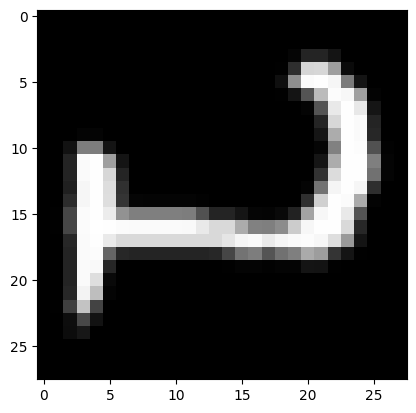

In [297]:
W = 28 # Width
H = 28 # Height

print("Label for the Image of Number 1000 :", labels_dictionary[sample_label])
plt.imshow(sample_image.values.reshape(W,H), cmap=plt.cm.gray)
plt.show()

The Visible Image is roteted anticlockwise 90 degrees and flipped.

Thus, We will create a function to rotate and flip the images.
fist we try it on sample image to see it it works 

In [298]:
def flip_rotate(image):
  image = image.reshape(28,28)
  image = np.fliplr(image)
  image = np.rot90(image)
  return image

Label of the Image for number 1000 :  J


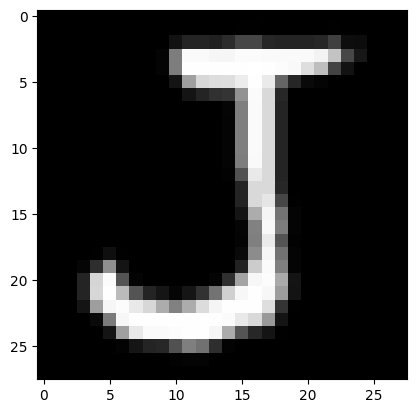

In [299]:
print("Label of the Image for number 1000 : ", labels_dictionary[sample_label])
plt.imshow(flip_rotate(sample_image.values), cmap= plt.cm.gray)
plt.show()

The fuction works for the sample image. 
Thus we will apply flip_rotate and reshape function to all images in x and 

In [300]:
x = np.apply_along_axis(flip_rotate,1,x.values)
x.shape

(86400, 28, 28)

**Visualising More Sample Images**

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   4   4   4   4   4
    4   2   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  20  81 125 127 127 127 127
  125  82  34   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  21 170 250 254 254 254 254 254
  254 252 243  90   7   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  37 215 254 253 222 217 217 222
  245 251 254 207  47   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  50 222 254 221  52  37  37  51
  114 159 241 246 145  15   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  80 233 250 129   0   0   0   0
    5 127 249 245 115   4   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  34 204 249 140   0   0   0   5
   47 177 252 220  50   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18  32   9   9 122 229 199   3   

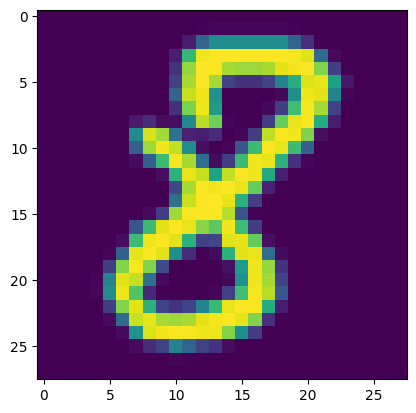

Label for the corresponding Image :  8
Shape of The corresponding Data point :  (28, 28)


In [301]:
print(x[50])
plt.imshow(x[50])
plt.show()
print("Label for the corresponding Image : ",labels_dictionary[y[50]])
print("Shape of The corresponding Data point : ",x[50].shape)

**Multiple Sample Images**

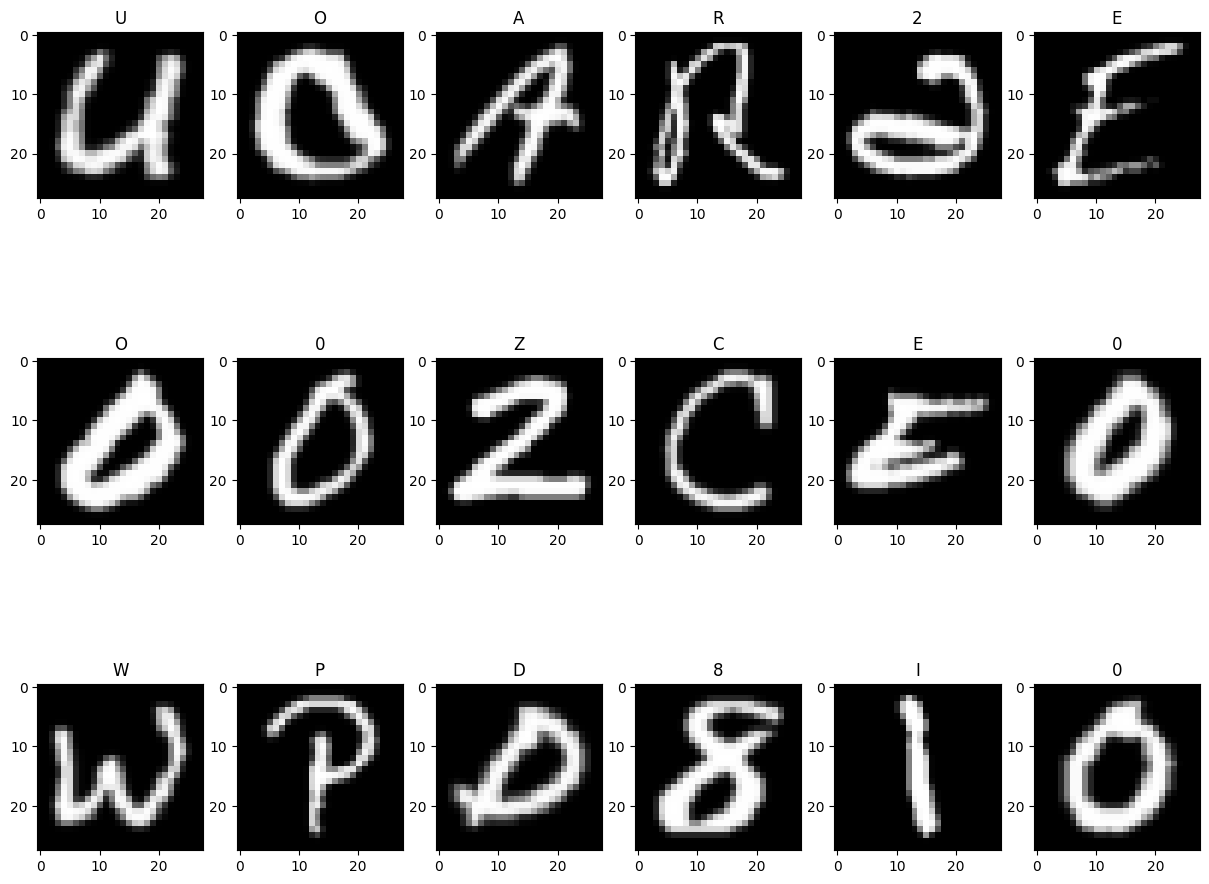

In [302]:
plt.figure(figsize=(15,12), dpi=100)
for i in range(110,128):
  plt.subplot(3,6,i-109)
  plt.imshow(x[i],cmap=plt.cm.gray)
  plt.title(labels_dictionary[y[i]])

All The images have same dimensions in the dataset, if not, we have to resize all the images to a common dimensions



**Data Scaling : Normalizing The Data**

Convert The input values between 0 to 1

In [303]:
x = x.astype("float32")/255
x[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.03529412, 0.1254902 ,
        0.01176471, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.1333

**One Hot Encoding of the Output Labels**

As the output values are integers, from 0 to 35, we must perform one hot encoding so as to get a number of output columns comprised of 0 and 1 class labels.


In [304]:
print("Unique Values : ",np.unique(y))
number_of_uniques = y.nunique()
print("Total Number of Unique Values in Label Data : ",number_of_uniques)

Unique Values :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]
Total Number of Unique Values in Label Data :  36


In [305]:
y = np_utils.to_categorical(y, number_of_uniques)
y.shape

(86400, 36)

**Reshaping the train data**

Tensorflow requires 4D Array,(batch,width, height, channel). our training data is in 3D array(no. of images, width, height), we will be adding one more dimension to the data

In [306]:
print("Shape of our training data : ",x.shape)

x = x.reshape(-1,W,H,1)
print("Shape of New data          : ",x.shape)

Shape of our training data :  (86400, 28, 28)
Shape of New data          :  (86400, 28, 28, 1)


**Model Building**

Split Dataframe into Training and Testing Data

In [307]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=1)

In [311]:
ann = Sequential()
ann.add(layers.Flatten())
ann.add(layers.Dense(300, activation='relu')) 
ann.add(layers.Dense(200, activation='relu'))
ann.add(layers.Dense(number_of_uniques, activation='sigmoid'))

In [312]:
ann.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])


**Model Fitting**

In [316]:
model=ann.fit(x_train,y_train,epochs=10)

Epoch 1/10
2430/2430 [==============================] - 15s 6ms/step - loss: 0.1792 - accuracy: 0.9258
Epoch 2/10
2430/2430 [==============================] - 15s 6ms/step - loss: 0.1723 - accuracy: 0.9280
Epoch 3/10
2430/2430 [==============================] - 16s 7ms/step - loss: 0.1652 - accuracy: 0.9311
Epoch 4/10
2430/2430 [==============================] - 16s 7ms/step - loss: 0.1612 - accuracy: 0.9325
Epoch 5/10
2430/2430 [==============================] - 16s 7ms/step - loss: 0.1584 - accuracy: 0.9340
Epoch 6/10
2430/2430 [==============================] - 15s 6ms/step - loss: 0.1505 - accuracy: 0.9369
Epoch 7/10
2430/2430 [==============================] - 16s 6ms/step - loss: 0.1540 - accuracy: 0.9357
Epoch 8/10
2430/2430 [==============================] - 15s 6ms/step - loss: 0.1441 - accuracy: 0.9387
Epoch 9/10
2430/2430 [==============================] - 16s 7ms/step - loss: 0.1454 - accuracy: 0.9396
Epoch 10/10
2430/2430 [==============================] - 16s 7ms/step - l

Training Data Accuracy = 94.03 %

Loss Function = 0.1431

In [324]:
loss,accuracy = ann.evaluate(x_test,y_test)
print("Accuracy",accuracy)

270/270 [==============================] - 1s 4ms/step - loss: 0.5964 - accuracy: 0.8697
Accuracy 0.8696759343147278


Test Data Accuracy : 87.01%

**Prediction of Datapoints**

In [82]:
y_pred = ann.predict(x_test)
y_pred.shape

270/270 [==============================] - 1s 3ms/step


(8640, 36)

In [89]:
y_pred[0]

array([9.2782620e-06, 1.3341506e-11, 1.5197886e-06, 3.6045012e-08,
       3.6701467e-06, 9.2397535e-08, 6.1507865e-09, 1.4528966e-07,
       8.8883098e-08, 3.0396077e-06, 5.0993276e-05, 2.5246512e-05,
       1.3117431e-05, 4.3482360e-06, 7.1484383e-06, 3.6015940e-08,
       3.4147975e-05, 5.3322615e-06, 1.5558091e-09, 1.8536094e-08,
       1.1601328e-06, 1.6773937e-08, 9.9948603e-01, 1.2325560e-04,
       1.6413358e-05, 1.4742768e-07, 1.3287988e-05, 7.1362760e-05,
       6.4066057e-07, 1.6945970e-09, 7.8258658e-05, 3.7580290e-09,
       9.6318417e-06, 1.5303351e-07, 8.0053934e-07, 4.0583178e-05],
      dtype=float32)

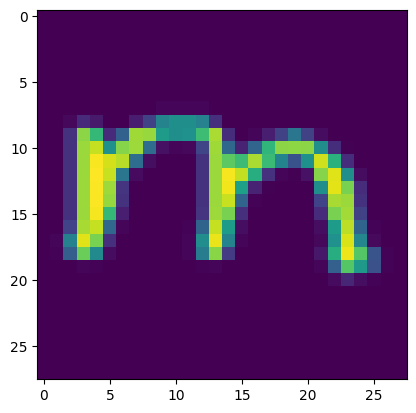

label_for_image :  M


In [95]:
plt.imshow(x_test[0])
plt.show()
label_for_image = np.argmax(y_pred[0])
print("label_for_image : ",labels_dictionary[y_pred[0].argmax()])

In [124]:
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[22, 25, 6, 19, 18, 28, 17, 9, 11, 16, 15, 30, 4, 31, 27, 33, 22, 2, 25, 28, 10, 31, 23, 29, 10, 35, 6, 30, 29, 8, 1, 17, 28, 34, 19, 6, 15, 10, 4, 23, 34, 11, 32, 29, 16, 35, 31, 17, 29, 2, 1, 10, 26, 3, 31, 1, 34, 10, 0, 22, 15, 19, 22, 7, 35, 19, 23, 8, 11, 27, 28, 8, 31, 32, 13, 30, 7, 1, 34, 5, 22, 22, 9, 11, 18, 23, 30, 10, 34, 33, 0, 32, 6, 19, 34, 30, 11, 35, 35, 17, 21, 13, 26, 1, 34, 6, 2, 9, 0, 28, 19, 28, 1, 35, 21, 19, 25, 2, 16, 0, 27, 30, 25, 26, 13, 5, 24, 24, 0, 5, 35, 6, 4, 13, 16, 6, 2, 1, 5, 10, 27, 8, 2, 24, 16, 33, 26, 18, 33, 14, 34, 28, 7, 24, 13, 11, 21, 27, 9, 18, 17, 2, 1, 25, 7, 22, 12, 31, 3, 2, 13, 30, 16, 18, 7, 1, 25, 24, 20, 6, 8, 33, 34, 26, 4, 6, 16, 4, 1, 23, 2, 34, 5, 13, 23, 0, 31, 6, 0, 10, 8, 32, 11, 19, 27, 25, 0, 6, 26, 35, 34, 5, 29, 19, 29, 10, 8, 23, 13, 9, 13, 29, 10, 15, 1, 3, 10, 0, 19, 2, 7, 12, 20, 12, 20, 20, 8, 2, 1, 35, 9, 2, 31, 20, 13, 34, 3, 0, 22, 0, 1, 24, 18, 35, 8, 31, 28, 23, 14, 2, 34, 23, 7, 12, 23, 0, 1, 34, 14, 14, 6, 16,

In [163]:
y_pred_labels=[]
for i in y_pred:
  j=np.argmax(i)
  k=labels_dictionary[y_pred[j].argmax()]
  y_pred_labels.append(k)

In [164]:
y_pred_labels

['N',
 'Z',
 'H',
 'S',
 'P',
 'T',
 '2',
 'G',
 'U',
 'M',
 'X',
 '1',
 'I',
 'H',
 'U',
 'Y',
 'N',
 '6',
 'Z',
 'T',
 'F',
 'H',
 'T',
 '8',
 'F',
 '6',
 'H',
 '1',
 '8',
 'B',
 'P',
 '2',
 'T',
 'J',
 'S',
 'H',
 'X',
 'F',
 'I',
 'T',
 'J',
 'U',
 'S',
 '8',
 'M',
 '6',
 'H',
 '2',
 '8',
 '6',
 'P',
 'F',
 '6',
 'J',
 'H',
 'P',
 'J',
 'F',
 'M',
 'N',
 'X',
 'S',
 'N',
 '9',
 '6',
 'S',
 'T',
 'B',
 'U',
 'U',
 'T',
 'B',
 'H',
 'S',
 'V',
 '1',
 '9',
 'P',
 'J',
 'S',
 'N',
 'N',
 'G',
 'U',
 'P',
 'T',
 '1',
 'F',
 'J',
 'Y',
 'M',
 'S',
 'H',
 'S',
 'J',
 '1',
 'U',
 '6',
 '6',
 '2',
 'V',
 'V',
 '6',
 'P',
 'J',
 'H',
 '6',
 'G',
 'M',
 'T',
 'S',
 'T',
 'P',
 '6',
 'V',
 'S',
 'Z',
 '6',
 'M',
 'M',
 'U',
 '1',
 'Z',
 '6',
 'V',
 'S',
 'A',
 'A',
 'M',
 'S',
 '6',
 'H',
 'I',
 'V',
 'M',
 'H',
 '6',
 'P',
 'S',
 'F',
 'U',
 'B',
 '6',
 'A',
 'M',
 'Y',
 '6',
 'P',
 'Y',
 'R',
 'J',
 'T',
 '9',
 'A',
 'V',
 'U',
 'V',
 'U',
 'G',
 'P',
 '2',
 '6',
 'P',
 'Z',
 '9',
 'N',
 '4'

**Visualizing Some Predicted Values**

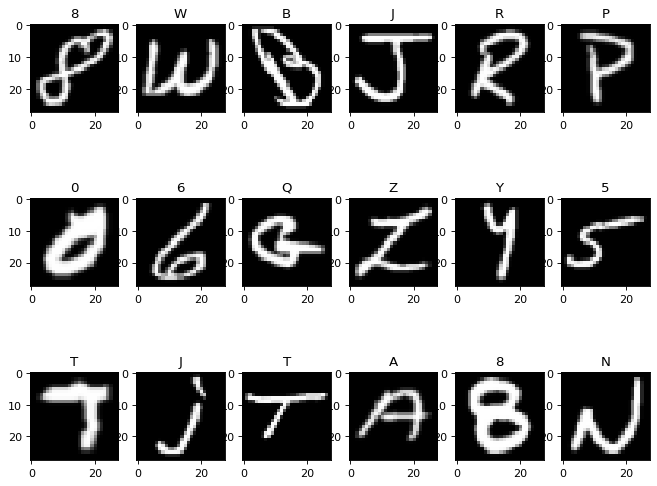

In [170]:
plt.figure(figsize=(10, 8), dpi=80)
for i in range(200, 218):
    plt.subplot(3,6,i-199)
    plt.imshow(x_test[i], cmap=plt.cm.gray)
    plt.title(labels_dictionary[y_pred[i].argmax()])

**Accuracy**

In [325]:
accuracy = ann.evaluate(x_test, y_test)
print('Loss value is ',accuracy[0])
print('Accuracy value is ',accuracy[1])

270/270 [==============================] - 1s 2ms/step - loss: 0.5964 - accuracy: 0.8697
Loss value is  0.5964473485946655
Accuracy value is  0.8696759343147278


Predicting the New data that came along with the dataset


Building a Predictive System

**PREDICTIVE SYSTEM**

Path of The Image To be Predicted : /content/image1.png


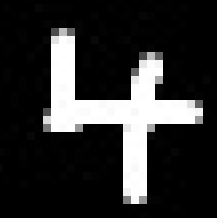

1/1 [==============================] - 0s 91ms/step
Label For The Image :  4


In [326]:
def image():
  image_path = input("Path of The Image To be Predicted : ")
  image = cv2.imread(image_path)
  cv2_imshow(image)
  gray_image=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  image_resized = cv2.resize(gray_image,(28,28))  
  image_resized = image_resize.astype("float32")/255
  image_reshaped = image_resize.reshape(-1,W,H,1)
  predict_img = ann.predict(image_reshaped)
  label_for_image = np.argmax(predict_img)
  print("Label For The Image : ",labels_dictionary[prediction.argmax()]) 
image()

Predicting the test data that came along with the dataset


In [327]:
path1="/content/drive/MyDrive/emnist-balanced-test.csv"

In [328]:
test_df = pd.read_csv(path1, header=None)
test_df.shape

(18800, 785)

Removing Lowercase Entries

In [329]:
test_df_new = test_df[test_df[0].isin(np.arange(0, 36))]
test_df_new.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,14400.000000,14400.0,14400.0,14400.0,14400.0,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,...,14400.0,14400.0,14400.0,14400.0,14400.0,14400.0,14400.0,14400.0,14400.0,14400.0
mean,17.500000,0.0,0.0,0.0,0.0,0.007917,0.025764,0.014722,0.012222,0.014722,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,10.388655,0.0,0.0,0.0,0.0,0.604236,2.012452,1.204803,1.019562,1.733652,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,8.750000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,17.500000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,26.250000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,35.000000,0.0,0.0,0.0,0.0,63.000000,213.000000,108.000000,95.000000,208.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [330]:
x_test = test_df_new.loc[:, 1:]
y_test = test_df_new.loc[:, 0]

x_test.shape, y_test.shape

((14400, 784), (14400,))

Flipping And Rotating

In [331]:
x_test = np.apply_along_axis(flip_rotate, 1, x_test)
y_test = np_utils.to_categorical(y_test, number_of_uniques)

x_test.shape, y_test.shape

((14400, 28, 28), (14400, 36))

Normalisation

In [332]:
x_test = x_test.astype('float32') / 255

Reshaping The data

In [333]:
x_test = x_test.reshape(-1, W, H, 1)
x_test.shape

(14400, 28, 28, 1)

In [334]:
test_accuracy = ann.evaluate(x_test, y_test)
print('Loss value is ',test_accuracy[0])
print('Accuracy value is ',test_accuracy[1])

450/450 [==============================] - 1s 3ms/step - loss: 0.5876 - accuracy: 0.8718
Loss value is  0.5875784158706665
Accuracy value is  0.8718055486679077


Prediction

In [335]:
y_pred_test = ann.predict(x_test)
y_pred_test.shape

450/450 [==============================] - 2s 4ms/step


(14400, 36)

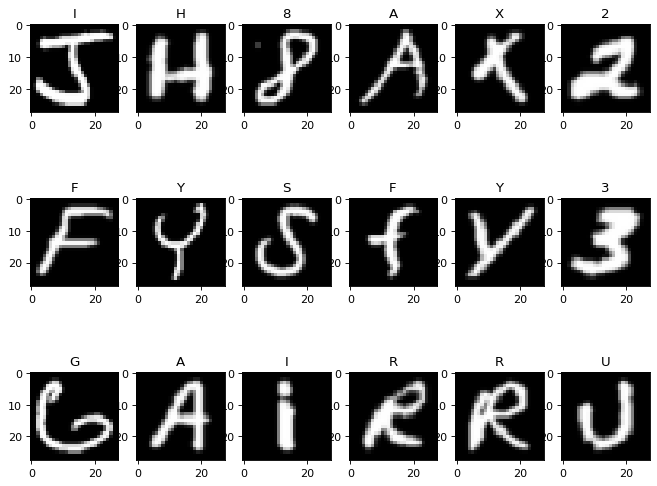

In [336]:
plt.figure(figsize=(10, 8), dpi=80)
for i in range(200, 218):
    plt.subplot(3,6,i-199)
    plt.imshow(x_test[i], cmap=plt.cm.gray)
    plt.title(labels_dictionary[y_pred_test[i].argmax()])